# Importing required Modules and Libraries

In [1]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Importing the Document 

In [3]:
text = open('Text.txt').read()

In [4]:
text

'Data science is an interdisciplinary field focused on extracting knowledge from data sets, which are typically large (see big data).[6] The field encompasses analysis, preparing data for analysis, and presenting findings to inform high-level decisions in an organization. As such, it incorporates skills from computer science, mathematics, statistics, information visualization, graphic design, complex systems, communication and business.[7][8] Statistician Nathan Yau, drawing on Ben Fry, also links data science to human-computer interaction: users should be able to intuitively control and explore data.[9][10] In 2015, the American Statistical Association identified database management, statistics and machine learning, and distributed and parallel systems as the three emerging foundational professional communities.[11]\n\nRelationship to statistics\nMany statisticians, including Nate Silver, have argued that data science is not a new field, but rather another name for statistics.[12] Oth

# Preprocessing the Text

In [5]:
# Preprocessing the data  
import re
text = re.sub(r'\[[0-9]*\]',' ',text)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

# Sentence Tokenizing

In [6]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences

['data science is an interdisciplinary field focused on extracting knowledge from data sets, which are typically large (see big data).',
 'the field encompasses analysis, preparing data for analysis, and presenting findings to inform high-level decisions in an organization.',
 'as such, it incorporates skills from computer science, mathematics, statistics, information visualization, graphic design, complex systems, communication and business.',
 'statistician nathan yau, drawing on ben fry, also links data science to human-computer interaction: users should be able to intuitively control and explore data.',
 'in , the american statistical association identified database management, statistics and machine learning, and distributed and parallel systems as the three emerging foundational professional communities.',
 'relationship to statistics many statisticians, including nate silver, have argued that data science is not a new field, but rather another name for statistics.',
 'others arg

In [7]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [8]:
sent_word

[['data',
  'science',
  'is',
  'an',
  'interdisciplinary',
  'field',
  'focused',
  'on',
  'extracting',
  'knowledge',
  'from',
  'data',
  'sets',
  ',',
  'which',
  'are',
  'typically',
  'large',
  '(',
  'see',
  'big',
  'data',
  ')',
  '.'],
 ['the',
  'field',
  'encompasses',
  'analysis',
  ',',
  'preparing',
  'data',
  'for',
  'analysis',
  ',',
  'and',
  'presenting',
  'findings',
  'to',
  'inform',
  'high-level',
  'decisions',
  'in',
  'an',
  'organization',
  '.'],
 ['as',
  'such',
  ',',
  'it',
  'incorporates',
  'skills',
  'from',
  'computer',
  'science',
  ',',
  'mathematics',
  ',',
  'statistics',
  ',',
  'information',
  'visualization',
  ',',
  'graphic',
  'design',
  ',',
  'complex',
  'systems',
  ',',
  'communication',
  'and',
  'business',
  '.'],
 ['statistician',
  'nathan',
  'yau',
  ',',
  'drawing',
  'on',
  'ben',
  'fry',
  ',',
  'also',
  'links',
  'data',
  'science',
  'to',
  'human-computer',
  'interaction',
  ':

# Stopwords Removal

In [9]:
for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

In [10]:
sent_word

[['data',
  'science',
  'interdisciplinary',
  'field',
  'focused',
  'extracting',
  'knowledge',
  'data',
  'sets',
  ',',
  'typically',
  'large',
  '(',
  'see',
  'big',
  'data',
  ')',
  '.'],
 ['field',
  'encompasses',
  'analysis',
  ',',
  'preparing',
  'data',
  'analysis',
  ',',
  'presenting',
  'findings',
  'inform',
  'high-level',
  'decisions',
  'organization',
  '.'],
 [',',
  'incorporates',
  'skills',
  'computer',
  'science',
  ',',
  'mathematics',
  ',',
  'statistics',
  ',',
  'information',
  'visualization',
  ',',
  'graphic',
  'design',
  ',',
  'complex',
  'systems',
  ',',
  'communication',
  'business',
  '.'],
 ['statistician',
  'nathan',
  'yau',
  ',',
  'drawing',
  'ben',
  'fry',
  ',',
  'also',
  'links',
  'data',
  'science',
  'human-computer',
  'interaction',
  ':',
  'users',
  'able',
  'intuitively',
  'control',
  'explore',
  'data',
  '.'],
 [',',
  'american',
  'statistical',
  'association',
  'identified',
  'databas

In [11]:
import pprint

In [12]:
# Count word frequencies
from collections import defaultdict

frequency = defaultdict(int)

for text in sent_word:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in sent_word]
pprint.pprint(processed_corpus)

[['data',
  'science',
  'interdisciplinary',
  'field',
  'focused',
  'knowledge',
  'data',
  ',',
  'typically',
  'large',
  '(',
  'big',
  'data',
  ')',
  '.'],
 ['field', 'analysis', ',', 'data', 'analysis', ',', '.'],
 [',',
  'computer',
  'science',
  ',',
  ',',
  'statistics',
  ',',
  ',',
  'design',
  ',',
  'systems',
  ',',
  '.'],
 [',', ',', 'also', 'data', 'science', ':', 'data', '.'],
 [',',
  'american',
  'statistical',
  'association',
  ',',
  'statistics',
  'machine',
  'learning',
  ',',
  'systems',
  'three',
  'professional',
  '.'],
 ['statistics',
  'many',
  ',',
  ',',
  'argued',
  'data',
  'science',
  'new',
  'field',
  ',',
  'name',
  'statistics',
  '.'],
 ['data', 'science', 'statistics', 'digital', 'data', '.'],
 ['writes', 'statistics', 'emphasizes', 'quantitative', 'data', '.'],
 [',', 'data', 'science', 'quantitative', 'data', '(', '.'],
 [')', 'emphasizes', '.'],
 ['columbia',
  'university',
  'data',
  'scientist',
  'described',
  '

# Creating Dictionaries

In [13]:
# Creating dictionaries, which helps during Topic modelling
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary(78 unique tokens: ['(', ')', ',', '.', 'big']...)


In [14]:
# Vector representation 
pprint.pprint(dictionary.token2id)

{"''": 58,
 "'s": 64,
 '(': 0,
 ')': 1,
 ',': 2,
 '.': 3,
 ':': 18,
 '``': 59,
 'also': 19,
 'american': 20,
 'analysis': 13,
 'applied': 41,
 'argued': 27,
 'association': 21,
 'attributed': 57,
 'bachelor': 72,
 'became': 50,
 'becoming': 73,
 'best': 69,
 'big': 4,
 'careers': 68,
 'collection': 56,
 'columbia': 35,
 'computer': 14,
 'computing': 39,
 'data': 5,
 'datasets': 40,
 'definition': 52,
 'degree': 74,
 'described': 36,
 'design': 15,
 'digital': 31,
 'discipline': 47,
 'education': 66,
 'emphasizes': 32,
 'engineers': 77,
 'field': 6,
 'first': 51,
 'focused': 7,
 'growing': 42,
 'interdisciplinary': 8,
 'jeff': 54,
 'job': 70,
 'journal': 60,
 'knowledge': 9,
 'large': 10,
 'later': 48,
 'launched': 61,
 'learning': 22,
 'machine': 23,
 'many': 28,
 'modern': 43,
 'name': 29,
 'new': 30,
 'next': 62,
 'professional': 24,
 'quantitative': 33,
 'ranked': 71,
 'research': 67,
 'science': 11,
 'scientist': 37,
 'scientists': 76,
 'section': 65,
 'statistical': 25,
 'statisti

# Training the Word2Vec Model

In [15]:
# Training the Word2Vec model
model = Word2Vec(sent_word, min_count=1)


words = model.wv.vocab

# Testing the Word2Vec Model

In [16]:
# Test the word vectors
vector = model.wv['systems']

print(vector)

[-1.7874977e-03 -8.5779541e-04 -9.7468140e-04  4.3989611e-03
 -4.0804506e-03 -4.3110554e-03  4.1335905e-03  9.8951708e-04
  2.9433237e-03  1.8708917e-03 -4.3347664e-03 -9.9030405e-04
  5.0013477e-04  2.4443332e-03 -2.6402427e-03  3.7124468e-04
  3.1556117e-03  2.6042531e-03  4.7448352e-03  4.2455406e-03
 -1.1674475e-03 -2.9323723e-03 -2.0385291e-03 -2.1670058e-03
  2.4821455e-05  3.6357641e-03  4.2331540e-03 -2.2435873e-03
  3.5405024e-03  1.5420970e-03  6.8917347e-04  1.9251740e-04
 -3.1783755e-03  4.8534763e-03  2.9601825e-03  4.1330466e-03
  4.6282825e-03  1.1132358e-03 -2.9772322e-03 -2.1782373e-03
 -2.0714365e-03 -1.8773014e-03  3.0239280e-03  4.9652415e-03
  1.6429081e-03  2.2741656e-03 -2.6704669e-03 -2.8230052e-04
 -2.0970586e-03 -1.1826801e-03  3.3970310e-03  3.8964215e-03
 -3.6246518e-03 -1.7582518e-03  3.6979136e-03 -3.2915531e-03
  6.8378416e-05 -4.5572766e-03 -4.9019483e-04 -4.7465484e-03
 -2.4498706e-03 -3.1489385e-03  2.4016587e-04  4.2011859e-03
  1.3936453e-03 -1.37326

# Similarity Checking of 20 Tokens

In [47]:
similar1 = model.wv.most_similar('definition',topn=5)
similar1

[('later', 0.2630983293056488),
 ('degree', 0.2384544163942337),
 ('branch', 0.21670712530612946),
 ('science', 0.20576396584510803),
 ('advocated', 0.2033749371767044)]

In [48]:
similar2 = model.wv.most_similar('computer',topn=5)
similar2

[('next', 0.3538835048675537),
 ('early', 0.23268158733844757),
 ('university', 0.22614574432373047),
 ('title', 0.22099199891090393),
 ('experience', 0.21405187249183655)]

In [49]:
similar3 = model.wv.most_similar('knowledge',topn=5)
similar3

[('experience', 0.29045623540878296),
 ('consensus', 0.25124192237854004),
 ('identified', 0.24812908470630646),
 ('field', 0.24356609582901),
 ('attributed', 0.24146661162376404)]

In [50]:
similar4 = model.wv.most_similar('analysis',topn=5)
similar4

[('misleadingly', 0.303490549325943),
 ('collections', 0.26469406485557556),
 ('’', 0.24420401453971863),
 ('inform', 0.23615196347236633),
 ('symposium', 0.23032669723033905)]

In [51]:
similar5 = model.wv.most_similar('research',topn=5)
similar5

[('vasant', 0.2872878909111023),
 ('technical', 0.27552908658981323),
 ('parallel', 0.27506208419799805),
 ('help', 0.25615859031677246),
 ('c.f', 0.24618518352508545)]

In [35]:
similar6 = model.wv.most_similar('scientist',topn=5)
similar6

[('high-level', 0.25165778398513794),
 ('argue', 0.25116610527038574),
 ('able', 0.2396744191646576),
 ('summary', 0.2096574753522873),
 ('problems', 0.2033291757106781)]

In [31]:
similar7 = model.wv.most_similar('section',topn=5)
similar7

[('control', 0.3175418972969055),
 ('training', 0.28077268600463867),
 ('machine', 0.26626044511795044),
 ('others', 0.2434900850057602),
 ('experience', 0.23133915662765503)]

In [32]:
similar8 = model.wv.most_similar('field',topn=5)
similar8

[('still', 0.31510329246520996),
 ('drawing', 0.24380362033843994),
 ('knowledge', 0.24356608092784882),
 ('identified', 0.22599856555461884),
 ('international', 0.21991002559661865)]

In [33]:
similar9 = model.wv.most_similar('first',topn=5)
similar9

[('resources', 0.3072819113731384),
 ('report', 0.27066802978515625),
 ('key', 0.27058660984039307),
 ('high-level', 0.25003179907798767),
 ('collections', 0.24362854659557343)]

In [34]:
similar10 = model.wv.most_similar('focused',topn=5)
similar10

[('others', 0.2553129494190216),
 ('manage', 0.2527209222316742),
 ('c.f', 0.23407822847366333),
 ('process', 0.2338176667690277),
 ('data', 0.23254108428955078)]

In [36]:
similar11 = model.wv.most_similar('statistical',topn=5)
similar11

[('enabling', 0.2422388195991516),
 ('digital', 0.21778151392936707),
 ('available', 0.21207889914512634),
 ('prepare', 0.20136088132858276),
 ('usage', 0.19236186146736145)]

In [37]:
similar12 = model.wv.most_similar('statistics',topn=5)
similar12

[('collection', 0.28351891040802),
 ('synonymous', 0.27161744236946106),
 ('conference', 0.26107218861579895),
 ('learning', 0.25147804617881775),
 ('association', 0.24752581119537354)]

In [38]:
similar13 = model.wv.most_similar('various',topn=5)
similar13

[('use', 0.2695271968841553),
 ('national', 0.2584358751773834),
 ('association', 0.24368014931678772),
 ('ascendant', 0.23871146142482758),
 ('complete', 0.2329712063074112)]

In [39]:
similar14 = model.wv.most_similar('would',topn=5)
similar14

[('systems', 0.3992074429988861),
 ('century', 0.26722490787506104),
 ('process', 0.2623556852340698),
 ('reflecting', 0.25067591667175293),
 ('complex', 0.23724034428596497)]

In [40]:
similar15 = model.wv.most_similar('writes',topn=5)
similar15

[('established', 0.29070866107940674),
 ('popular', 0.24548545479774475),
 ('”', 0.2327979952096939),
 ('explore', 0.2293562889099121),
 ('argued', 0.21722164750099182)]

In [41]:
similar16 = model.wv.most_similar('used',topn=5)
similar16

[('acknowledged', 0.2502188980579376),
 ('shed', 0.24212363362312317),
 ('number', 0.2213144451379776),
 ('broadly', 0.21946029365062714),
 ('collection', 0.2094474881887436)]

In [42]:
similar17 = model.wv.most_similar('usage',topn=5)
similar17

[('acknowledged', 0.26217082142829895),
 ('choose', 0.23218676447868347),
 ('america', 0.22423169016838074),
 ('statistics', 0.22263488173484802),
 ('datasets', 0.2216004878282547)]

In [43]:
similar18 = model.wv.most_similar('digital',topn=5)
similar18

[('origins', 0.26653337478637695),
 ('nonessential', 0.24814987182617188),
 ('enabling', 0.24800598621368408),
 ('high-level', 0.24548378586769104),
 ('federation', 0.2337607890367508)]

In [44]:
similar19 = model.wv.most_similar('discipline',topn=5)
similar19

[('statistician', 0.248827263712883),
 ('discovery', 0.2257639467716217),
 ('silver', 0.21148204803466797),
 ('systems', 0.16830289363861084),
 ('classification', 0.16319578886032104)]

In [52]:
similar20 = model.wv.most_similar('job',topn=5)
similar20

[('communities', 0.25155556201934814),
 ('becoming', 0.23761172592639923),
 ('suggested', 0.23648887872695923),
 ('inform', 0.2350206971168518),
 ('emphasizes', 0.2221423238515854)]

# 2D Graph to see word words similarity of 20 words

C:\Users\Jarvis\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


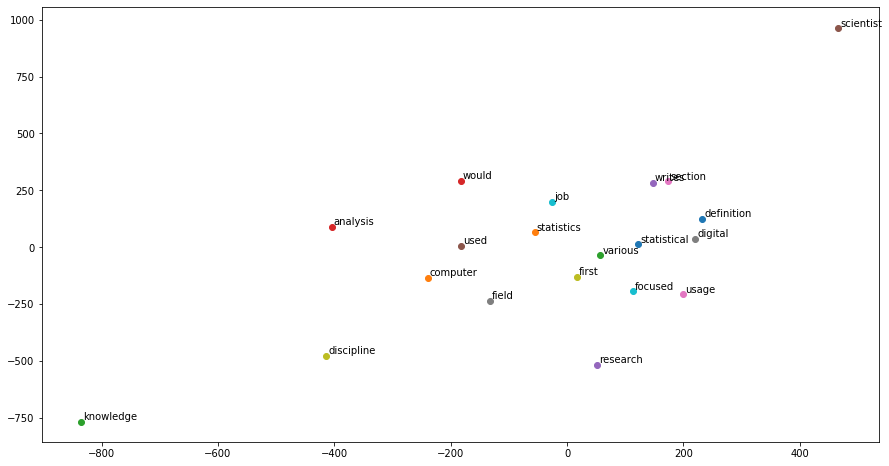

In [54]:
from sklearn.manifold import  TSNE
vocab = ['definition','computer','knowledge','analysis','research','scientist','section','field','first','focused','statistical',
          'statistics','various','would','writes','used','usage','digital','discipline','job']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)